In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./input/RIPHarambe.csv')
df.head()

,Timestamp,Tweet
0,5/29/2019 15:40,"b""RT @Jonny_her_she: It's been 3 long years #R..."
1,5/29/2019 15:39,b'RT @BasedBeefy: I miss you so fucken much #R...
2,5/29/2019 15:38,b'RT @SamTulipane: 3 years ago this sweet prin...
3,5/29/2019 15:34,"b""RT @EvilJoeyVotto: Let's win today for our b..."
4,5/29/2019 15:28,b'RT @Krisp838: That 3 year old we killed #Har...


In [4]:
df['Tweet'].replace(to_replace=r'^b', value='', regex=True, inplace=True)
df['Tweet'] = df['Tweet'].str.strip('"|\'')
df['Tweet'] = df['Tweet'].str.strip() 

print(df.sample(5))

            Timestamp                                              Tweet
1106  5/28/2019 22:13  RT @BasedBeefy: I miss you so fucken much #RIP...
303    5/29/2019 3:39  #RIPHarambe @datsik @Excision @diontimmermusic...
1826  5/28/2019 19:42  3 years later, and it still doesn\xe2\x80\x99t...
8     5/29/2019 15:20  RT @sirwahlie: As of yesterday, we lost a wond...
1504  5/28/2019 20:43  Today marks three years since Harambe left us ...


In [6]:
df['Tweet'].replace(to_replace = r'\\n', value = ' ', regex = True, inplace = True)
df['Tweet'].replace(to_replace = r'\\xe2\\x80\\x99', value = '\'',  regex = True, inplace = True)
df['Tweet'].replace(to_replace = r'\\xe2\\x80\\xa6', value = '...', regex = True, inplace = True)
df['Tweet'].replace(to_replace = r'\\x[0-9a-fA-F][0-9a-fA-F]', value = '', regex = True, inplace = True)

In [7]:
for i in range(0, len(df)):
    df['Tweet'][i] = df['Tweet'][i].split('http')[0]
    
    if df['Tweet'].loc[i].find(':') != -1:
        df['Tweet'].loc[i] = df['Tweet'].loc[i].split(':')[1]
        
    df['Tweet'].loc[i] = ' '.join(x for x in df['Tweet'][i].split() if not x.startswith('#'))
    df['Tweet'].loc[i] = ' '.join(x for x in df['Tweet'][i].split() if not x.startswith('@'))

In [8]:
checkWords = ['x[0-9a-fA-F][0-9a-fA-F]', '#', '@']

for i in checkWords:
    x = df[df['Tweet'].str.contains(i)]
    if len(x) > 0:
        print('search:   \"{}\"\n{}\n\n'.format(i, x))

search:   "x[0-9a-fA-F][0-9a-fA-F]"
          Timestamp                                              Tweet
484  5/29/2019 1:43  I believe God gave us this rainbow today becau...


search:   "#"
            Timestamp                                              Tweet
652    5/29/2019 0:35  Harambe has really been gone for 3 years...#RI...
994   5/28/2019 22:41  I can't believe it's been 3 years.... miss you...
1827  5/28/2019 19:42  It's been 3 hard years since he's passed.#RIPH...
2076  5/28/2019 18:59  NEW MUSIC VIDEO OUT NOW ON YOUTUBE type in Jef...


search:   "@"
           Timestamp                                              Tweet
474   5/29/2019 1:49  .@elonmusk We would appreciate a generous dona...
513   5/29/2019 1:27  .@elonmusk We would appreciate a generous dona...
518   5/29/2019 1:26  .@elonmusk We would appreciate a generous dona...
986  5/28/2019 22:43  .@prattprattpratt in remembrance of our dear f...




In [9]:
df['Tweet'].replace(to_replace=r'#RIPHaramble', value='', regex=True, inplace=True)
df['Tweet'].replace(to_replace=r'#SHARE NOW', value='', regex=True, inplace=True)
df['Tweet'].replace(to_replace=r'\.@elonmusk', value='', regex=True, inplace=True)
df['Tweet'].replace(to_replace=r'\.@prattprattpratt', value='', regex=True, inplace=True)

In [10]:
for i in checkWords:
    x = df[df['Tweet'].str.contains(i)]
    if len(x) > 0:
        print(i)

x[0-9a-fA-F][0-9a-fA-F]
#


In [11]:
print(df.sample(20))

            Timestamp                                              Tweet
7     5/29/2019 15:21  3 years ago this sweet prince was murdered. Le...
462    5/29/2019 1:53               We all had our dicks out 3 years ago
2116  5/28/2019 18:51                                                   
1511  5/28/2019 20:42                              paint scheme concept.
770   5/28/2019 23:51                                                   
800   5/28/2019 23:41  3 years ago this sweet prince was murdered. Le...
909   5/28/2019 23:02  I want to go up with Harambe in the sky That's...
648    5/29/2019 0:36  It's been 3 years since Harambe was shot and k...
1845  5/28/2019 19:39  3 years ago today, we lost the one and only le...
453    5/29/2019 1:58  Today marks three years of a lost brave soul. ...
725    5/29/2019 0:03   Three years ago today, Cincinnati lost a legend.
1493  5/28/2019 20:46                                                   
702    5/29/2019 0:09                              

In [12]:
df['Tweet'] = df['Tweet'].str.lower()
df['Tweet'].replace(to_replace='legends', value='legend', regex=True, inplace=True)

In [13]:
remove_words = ['3', 'long', 'years', 'year', 'goes', 'cant',
                'today', 'ago', 'later', 'three', 'fucking',
                'fucken', 'happen', 'much', 'dietrich', 'shit',
                'tweet', 'im', 'follow', 'lifete', 'think', 'well',
                'will', 'going', 'twitter', 'ain\'t', 'right',
                'now', 'y\'all', 'seems', 'inrnet', 'uni', 'joke',
                'game', 'name', 'ally', 'anal', 'gat', 'guy', 'yet',
                'charity', 'telethon', 'dont', 'said', 'brands', 'make',
                'see', 'internet', 'amp', 'en', 'est', 'el', 'hr', 'dm', 'ya']

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GoDoVoReZ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))

#  append nltk_stopwords to remove_words
for i in nltk_stopwords:
    remove_words.append(i)  # append

#  remove_words: sort and unique
remove_words.sort()
remove_words = list(set(remove_words))

print('remove_words:\t', len(remove_words))

remove_words:	 232


In [19]:
remove_pattern = r'\b(?:{})\b'.format('|'.join(remove_words))

df['Tweet'] = df['Tweet'].str.replace(remove_pattern, '')

print(len(remove_words), 'words removed')

232 words removed


In [20]:
df['Tweet'].replace(to_replace=r'\.|\!|\,|\-|\'|\(|\?|\_', value='', regex=True, inplace=True)

print(len(df[df['Tweet'].str.contains('\.|\!|\,|\-|\'|\(|\?|\_')]), 'punctuations found')

0 punctuations found


legend        517
lost          401
never         370
harambe       331
sweet         328
prince        327
die           252
murdered      246
cincinnati    207
miss          204
dtype: int64


[]

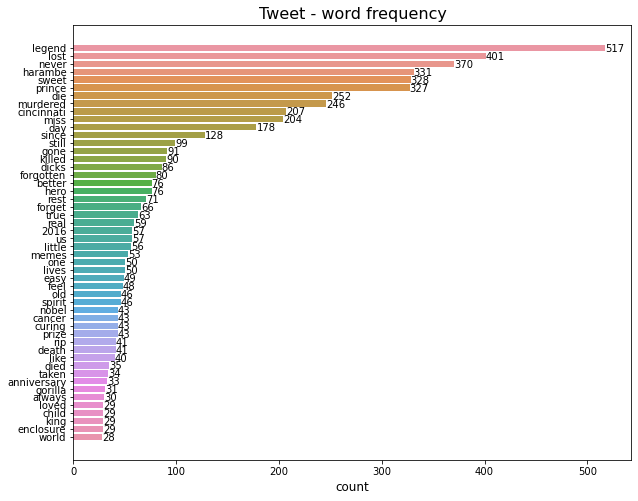

In [21]:
word_frequency = df['Tweet'].str.split(expand=True).stack().value_counts()
print(word_frequency.head(10))

freq = word_frequency.head(50)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x=freq.values, y=freq.index)
plt.title('Tweet - word frequency', fontsize=16)
plt.xlabel('count', fontsize=12)

for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(),
                p.get_y()+.5), ha='left', va='center')

plt.plot()

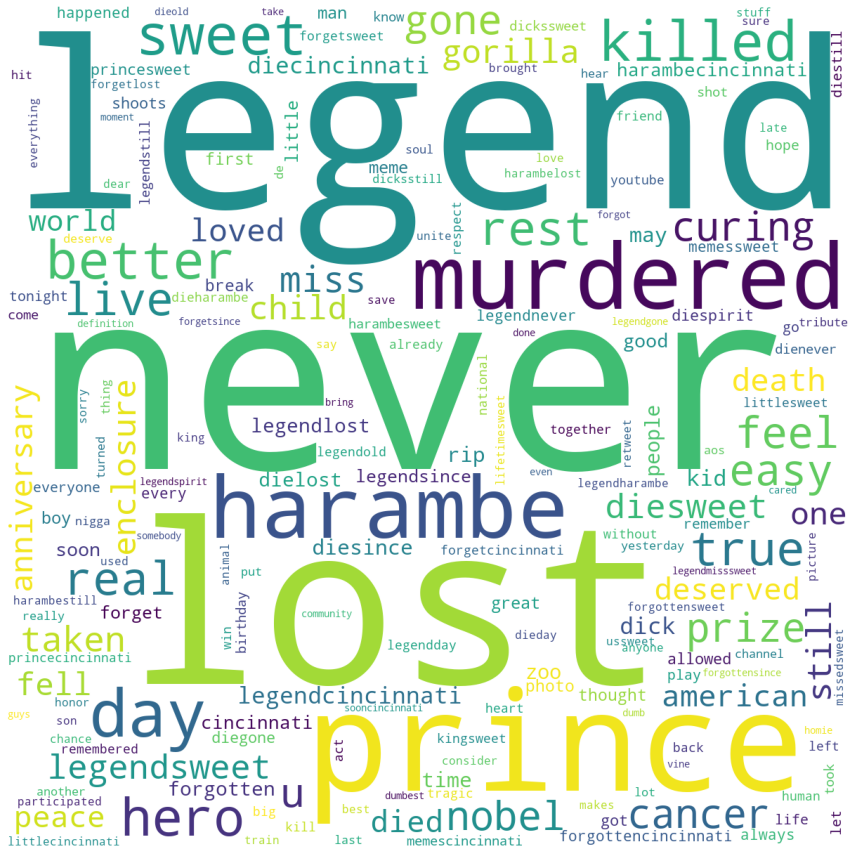

word cloud has 54735 words, with 50 unique words


In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wc_string = ''

for text in df.Tweet:
    text = str(text)
    text_split = text.split()
    
    wc_string = wc_string + ' '.join(text_split)
    
wc_string = wc_string.lower()


wordcloud = WordCloud(width=1200, height=1200,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=False,
                      min_font_size=10).generate(wc_string)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

print('word cloud has', len(wc_string), 'words, with', len(set(wc_string)), 'unique words')